In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy
from IPython import display
import seaborn as sns
from scipy import signal
import parkinson_modules as pm
import warnings
import pickle
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
from scipy.signal import butter, welch, filtfilt
warnings.filterwarnings('ignore')
%matplotlib inline
import ahrs

In [50]:
DATKA = pd.DataFrame()

In [51]:
win_size = 10

path = 'C:/Files/parkinson/21'
patient = pm.parkinson(path)
patient.read(filtering = False)
# for col in patient.exercises[EXER_IND]:
#     DATKA[col + ' raw'] = patient.exercises[EXER_IND][col]

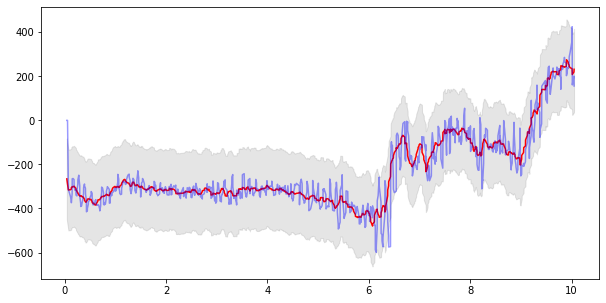

In [52]:
EXER_IND = 5
pm.plot_mean_and_variance(patient.exercises[EXER_IND]['acc_x, mg'], 
                          patient.time[EXER_IND])

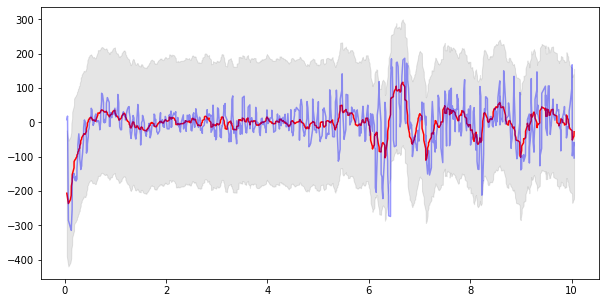

In [53]:
win_size = 10

path = 'C:/Files/parkinson/21'
patient = pm.parkinson(path)
patient.read(filtering = True)
EXER_IND = 5
pm.plot_mean_and_variance(patient.exercises[EXER_IND]['acc_x, mg'], 
                          patient.time[EXER_IND])

In [54]:
for col in patient.exercises[EXER_IND]:
    DATKA[col + ' filt'] = patient.exercises[EXER_IND][col]

In [55]:
DATKA['time'] = patient.time[EXER_IND]

In [59]:
DATKA.to_csv('C:/Users/alexandr/Desktop/DATKA_EXAMPLE_PARKINSON.csv')

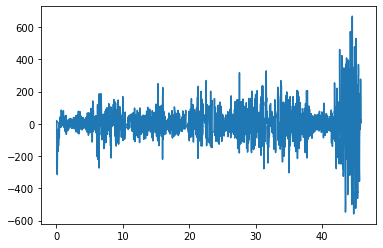

In [61]:
plt.plot(DATKA['time'], DATKA['acc_x, mg filt'])

In [48]:
os.chdir('C:\Files\parkinson')
info = pd.read_excel('Info.xlsx')
info = info.fillna(value = -1)
info.head(5)

,date,ID,ФИО,пол,возраст,Степень Паркинсона,Травмы/Патологии/Болезни,Баг в эксперименте1,Баг в эксперименте2,index1,index2,Unnamed: 11,postural,kinetic,rest
0,-1,1,Екатерина К,ж,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0
1,-1,2,Анна Т,ж,23.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0
2,-1,3,Александр Т,м,22.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0
3,-1,4,Иван Д,м,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0
4,-1,5,Дмитрий Е,м,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12",-1.0,-1.0,-1.0,-1.0


Text(0.5, 0, 'time, s')

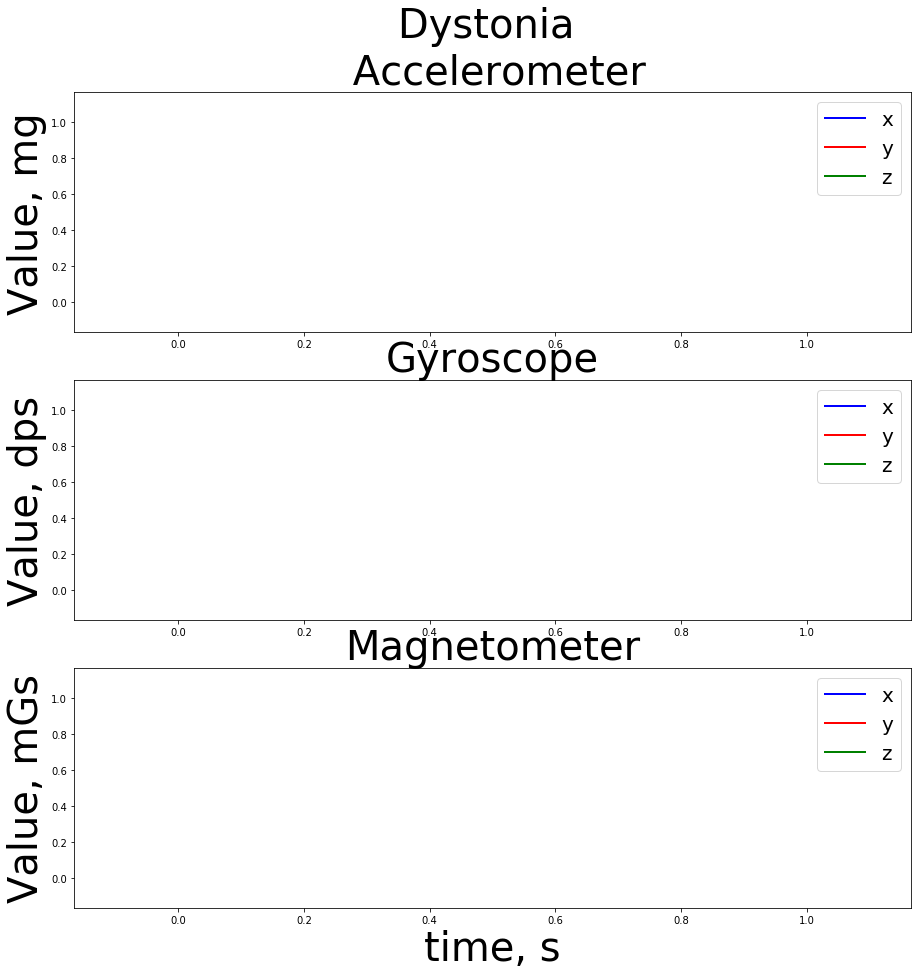

In [49]:
win_size = 10

path = 'C:/Files/parkinson/21'
patient = pm.parkinson(path)
patient.read()
f, (ax0, ax1, ax2) = plt.subplots(3,1, figsize = (15,15), ) 
idx = 10
start = 3000
end = 5500

ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_x, mg'][start:end].rolling(win_size).mean(), c = 'b', linewidth=2)
ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_y, mg'][start:end].rolling(win_size).mean(), c = 'r', linewidth=2)
ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_z, mg'][start:end].rolling(win_size).mean(), c = 'g', linewidth=2)
ax0.set_title('Dystonia \n Accelerometer', fontsize = 40)
ax0.set_ylabel('Value, mg', fontsize = 40)
ax0.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_x, dps'][start:end].rolling(51).mean(), c = 'b', linewidth=2)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_y, dps'][start:end].rolling(51).mean(), c = 'r', linewidth=2)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_z, dps'][start:end].rolling(51).mean(), c = 'g', linewidth=2)
ax1.set_title('Gyroscope', fontsize = 40)
ax1.set_ylabel('Value, dps', fontsize = 40)

ax1.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)

ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_x, mga'][start:end].rolling(51).mean(), c = 'b', linewidth=2)
ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_y, mga'][start:end].rolling(51).mean(), c = 'r', linewidth=2)
ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_z, mga'][start:end].rolling(51).mean(), c = 'g', linewidth=2)
ax2.set_title('Magnetometer', fontsize = 40)
ax2.set_ylabel('Value, mGs', fontsize = 40)

ax2.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)

ax2.set_xlabel('time, s', fontsize = 40)

In [ ]:


path = 'C:/Files/parkinson/43'
patient = pm.parkinson(path)
patient.read()
f, (ax0, ax1, ax2) = plt.subplots(3,1, figsize = (15,15)) 
idx = 10
win_size = 100
start = 2000
end = 4500
ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_x, mg'][start:end].rolling(win_size).mean(), c = 'b', linewidth=2)
ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_y, mg'][start:end].rolling(win_size).mean(), c = 'r', linewidth=2)
ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_z, mg'][start:end].rolling(win_size).mean(), c = 'g', linewidth=2)
ax0.set_title('PD 2 stage \n Accelerometer', fontsize = 40)
ax0.set_ylabel('Value, mg', fontsize = 40)
ax0.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_x, dps'][start:end].rolling(51).mean(), c = 'b', linewidth=2)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_y, dps'][start:end].rolling(51).mean(), c = 'r', linewidth=2)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_z, dps'][start:end].rolling(51).mean(), c = 'g', linewidth=2)
ax1.set_title('Gyroscope', fontsize = 40)
ax1.set_ylabel('Value, dps', fontsize = 40)

ax1.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)

ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_x, mga'][start:end].rolling(51).mean(), c = 'b', linewidth=2)
ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_y, mga'][start:end].rolling(51).mean(), c = 'r', linewidth=2)
ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_z, mga'][start:end].rolling(51).mean(), c = 'g', linewidth=2)
ax2.set_title('Magnetometer', fontsize = 40)
ax2.set_ylabel('Value, mGs', fontsize = 40)

ax2.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)

ax2.set_xlabel('time, s', fontsize = 40)

In [ ]:


path = 'C:/Files/parkinson/10'
patient = pm.parkinson(path)
patient.read()
f, (ax0, ax1, ax2) = plt.subplots(3,1, figsize = (15,15)) 
idx = 10
win_size = 100
start = 2000
end = 4500
ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_x, mg'][start:end].rolling(win_size).mean(), c = 'b', linewidth=2)
ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_y, mg'][start:end].rolling(win_size).mean(), c = 'r', linewidth=2)
ax0.plot( patient.time[idx][start:end]-start/100, patient.exercises[idx]['acc_z, mg'][start:end].rolling(win_size).mean(), c = 'g', linewidth=2)
ax0.set_title('Health subject \n Accelerometer', fontsize = 40)
ax0.set_ylabel('Value, mg', fontsize = 40)
ax0.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_x, dps'][start:end].rolling(51).mean(), c = 'b', linewidth=2)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_y, dps'][start:end].rolling(51).mean(), c = 'r', linewidth=2)
ax1.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['gyr_z, dps'][start:end].rolling(51).mean(), c = 'g', linewidth=2)
ax1.set_title('Gyroscope', fontsize = 40)
ax1.set_ylabel('Value, dps', fontsize = 40)

ax1.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)

ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_x, mga'][start:end].rolling(51).mean(), c = 'b', linewidth=2)
ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_y, mga'][start:end].rolling(51).mean(), c = 'r', linewidth=2)
ax2.plot( patient.time[idx][start:end] - start/100, patient.exercises[idx]['mag_z, mga'][start:end].rolling(51).mean(), c = 'g', linewidth=2)
ax2.set_title('Magnetometer', fontsize = 40)
ax2.set_ylabel('Value, mGs', fontsize = 40)

ax2.legend(['x', 
            'y',
            'z'], loc = 1, fontsize = 20)

ax2.set_xlabel('time, s', fontsize = 40)


In [5]:
train_features = pd.read_pickle('C:/Files/parkinson/train_features_500points_50overlap_new_2std.pkl')
test_features = pd.read_pickle('C:/Files/parkinson/test_features_500points_50overlap_new_2std.pkl')
features = train_features.append(test_features, ignore_index=True)
train_features = train_features.fillna(4)

In [6]:
parkinson_or_not_df = features[(features.target != 0)*(features.target != 3)]
parkinson_or_not_df.target = np.array(parkinson_or_not_df.target > 3, dtype = np.int)

In [7]:
parkinson_or_not_df.target.value_counts()

0    8943
1    3666
Name: target, dtype: int64

In [8]:
parkinson_or_not_df.columns

Index(['acc_x, mg_std', 'acc_x, mg_mean', 'acc_x, mg_skew',
       'acc_x, mg_kurtosis', 'acc_x, mg_differential_mean',
       'acc_x, mg_differential_std', 'acc_x, mg_noise_std',
       'acc_x, mg_noise_mean', 'acc_x, mg_noise_more3hz_peaks_freq_mean',
       'acc_x, mg_noise_more3hz_peaks_freq_std',
       ...
       'mag_z, mga_trend_less3hz_peaks_amplitude_mean',
       'mag_z, mga_trend_less3hz_peaks_amplitude_std',
       'mag_z, mga_trend_less3hz_peaks_amplitude_min',
       'mag_z, mga_trend_less3hz_peaks_amplitude_max',
       'mag_z, mga_trend_less3hz_dominant_amplitude',
       'mag_z, mga_trend_spectrum_energy_mean',
       'mag_z, mga_trend_spectrum_energy_std', 'name', 'target',
       'exercise_index'],
      dtype='object', length=471)

In [9]:
datka = parkinson_or_not_df[(parkinson_or_not_df['acc_x, mg_trend_more3hz_dominant_frequency'] > 0.1)*(parkinson_or_not_df['acc_x, mg_trend_more3hz_dominant_frequency'] < 8)]

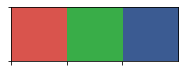

In [10]:
colors = ["pale red", "medium green", "denim blue"]
sns.palplot(sns.xkcd_palette(colors))

Text(0, 0.5, 'Probability')

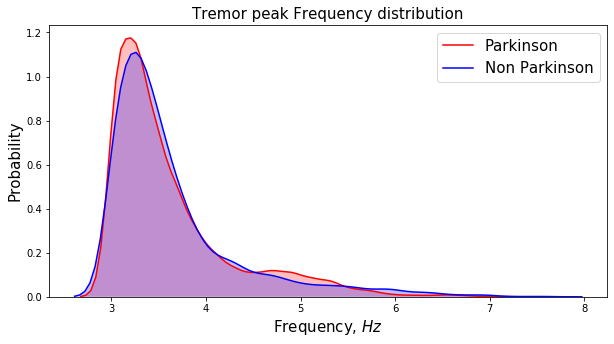

In [11]:
f, ax = plt.subplots(1,1, figsize = (10,5))
datka = parkinson_or_not_df[(parkinson_or_not_df['acc_x, mg_trend_more3hz_dominant_frequency'] > 0.1)*(parkinson_or_not_df['acc_x, mg_trend_more3hz_dominant_frequency'] < 8)]
sns.kdeplot(datka[datka.target == 0]['acc_x, mg_trend_more3hz_dominant_frequency'], shade = True, color="r",   ax = ax)
sns.kdeplot(datka[datka.target == 1]['acc_x, mg_trend_more3hz_dominant_frequency'] , shade = True, color="b", ax = ax)
ax.legend([
    'Parkinson',
    'Non Parkinson'
], fontsize = 15)
ax.set_title("Tremor peak Frequency distribution", fontsize = 15)
ax.set_xlabel("Frequency, $Hz$", fontsize = 15)
ax.set_ylabel("Probability", fontsize = 15)

Text(0, 0.5, 'Probability')

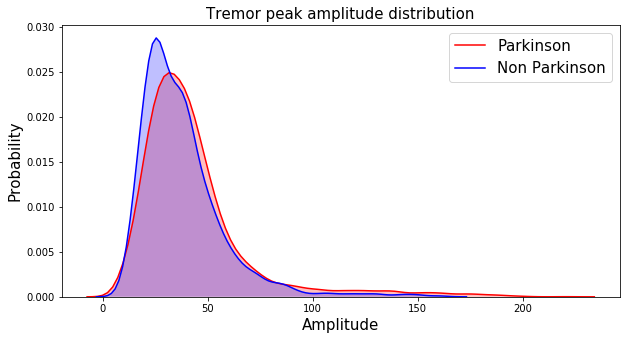

In [12]:
f, ax = plt.subplots(1,1, figsize = (10,5))
datka = parkinson_or_not_df[(parkinson_or_not_df['acc_x, mg_trend_more3hz_dominant_amplitude'] > 0.1)]
sns.kdeplot(datka[datka.target == 0]['acc_x, mg_trend_more3hz_dominant_amplitude'], shade = True, color="r", ax = ax)
sns.kdeplot(datka[datka.target == 1]['acc_x, mg_trend_more3hz_dominant_amplitude'] , shade = True, color="b", ax = ax)
ax.legend([
    'Parkinson',
    'Non Parkinson'
], fontsize = 15)
ax.set_title("Tremor peak amplitude distribution", fontsize = 15)
ax.set_xlabel("Amplitude", fontsize = 15)
ax.set_ylabel("Probability", fontsize = 15)

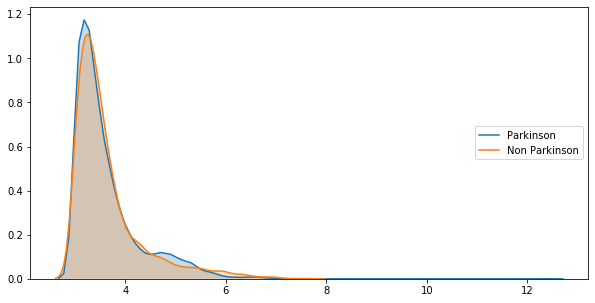

In [13]:
f, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(datka[datka.target == 0]['acc_x, mg_trend_more3hz_dominant_frequency'], shade = True, ax = ax)
sns.kdeplot(datka[datka.target == 1]['acc_x, mg_trend_more3hz_dominant_frequency'] , shade = True, ax = ax)
ax.legend([
    'Parkinson',
    'Non Parkinson'
], loc = 5)

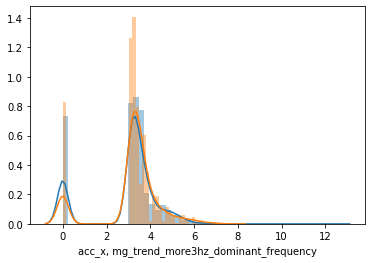

In [14]:
sns.distplot(parkinson_or_not_df[parkinson_or_not_df.target == 0]['acc_x, mg_trend_more3hz_dominant_frequency'])
sns.distplot(parkinson_or_not_df[parkinson_or_not_df.target == 1]['acc_x, mg_trend_more3hz_dominant_frequency'])

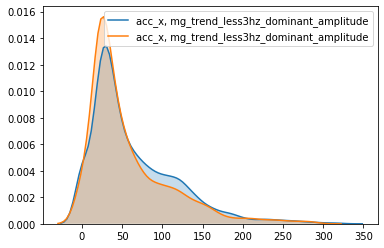

In [15]:
sns.kdeplot(parkinson_or_not_df[parkinson_or_not_df.target == 0]['acc_x, mg_trend_less3hz_dominant_amplitude'], shade = True)
sns.kdeplot(parkinson_or_not_df[parkinson_or_not_df.target == 1]['acc_x, mg_trend_less3hz_dominant_amplitude'] , shade = True)

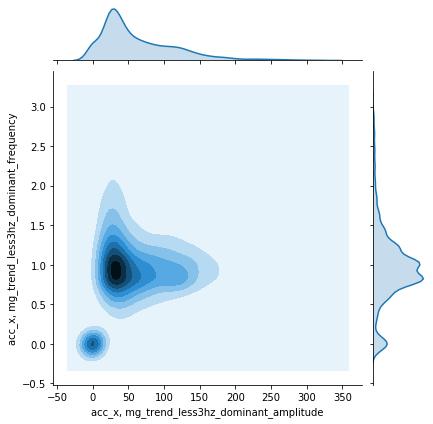

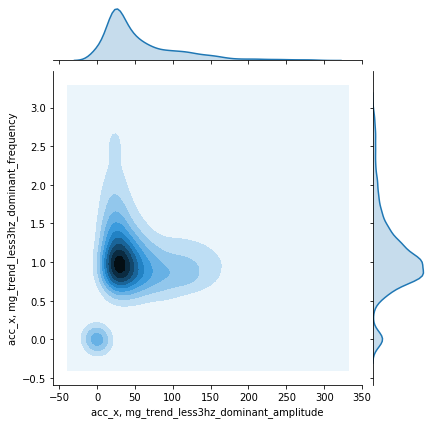

In [16]:
sns.jointplot(x='acc_x, mg_trend_less3hz_dominant_amplitude', y="acc_x, mg_trend_less3hz_dominant_frequency", data=parkinson_or_not_df[parkinson_or_not_df.target == 0], kind="kde");
sns.jointplot(x='acc_x, mg_trend_less3hz_dominant_amplitude', y="acc_x, mg_trend_less3hz_dominant_frequency", data=parkinson_or_not_df[parkinson_or_not_df.target == 1], kind="kde");


In [17]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

In [18]:
datka = features[(features["acc_x, mg_trend_more3hz_dominant_frequency"] > 0.1)*(features["acc_x, mg_trend_more3hz_dominant_frequency"] < 8)]

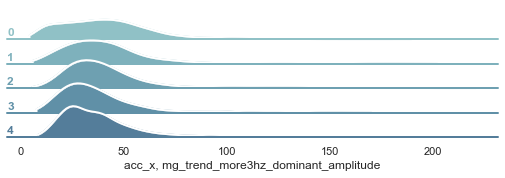

In [19]:
g = sns.FacetGrid(datka, row="target", hue="target", aspect=15, height=.5, palette=pal)
g.map(sns.kdeplot, "acc_x, mg_trend_more3hz_dominant_amplitude", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "acc_x, mg_trend_more3hz_dominant_amplitude", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "acc_x, mg_trend_more3hz_dominant_amplitude")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

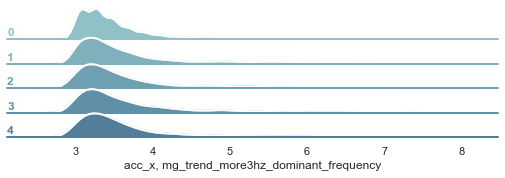

In [20]:
g = sns.FacetGrid(datka, row="target", hue="target", aspect=15, height=.5, palette=pal)
g.map(sns.kdeplot, "acc_x, mg_trend_more3hz_dominant_frequency", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "acc_x, mg_trend_more3hz_dominant_frequency", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "acc_x, mg_trend_more3hz_dominant_frequency")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

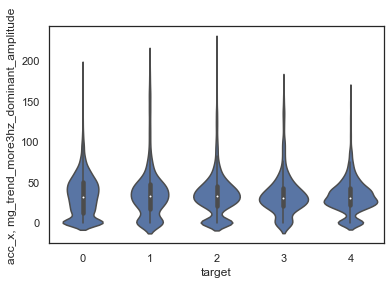

In [21]:
sns.violinplot(x="target", y="acc_x, mg_trend_more3hz_dominant_amplitude",
              color="b", data=features)

In [103]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 30, max_depth= 5)
X = features.drop(columns = ['target', 'name', 'exercise_index'])
y = features['target']

In [104]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
feature_importance = pd.Series(rfc.feature_importances_,
                                          index = X.columns).sort_values(ascending = True)


In [115]:
features_list = list(feature_importance.keys()[-30:])

In [116]:
features_list

['acc_x, mg_trend_spectrum_energy_mean',
 'gyr_x, dps_noise_more3hz_peaks_freq_std',
 'acc_x, mg_noise_spectrum_energy_mean',
 'mag_y, mga_std',
 'acc_x, mg_noise_more3hz_peaks_amplitude_std',
 'mag_y, mga_noise_more3hz_peaks_freq_max',
 'acc_y, mg_noise_more3hz_peaks_freq_mean',
 'acc_y, mg_noise_more3hz_peaks_amplitude_mean',
 'gyr_z, dps_std',
 'acc_z, mg_noise_more3hz_peaks_freq_mean',
 'mag_x, mga_noise_less3hz_peaks_amplitude_mean',
 'mag_x, mga_std',
 'acc_x, mg_noise_more3hz_peaks_freq_mean',
 'acc_z, mg_noise_std',
 'gyr_x, dps_std',
 'gyr_y, dps_noise_more3hz_peaks_freq_max',
 'acc_x, mg_noise_more3hz_peaks_freq_std',
 'gyr_y, dps_noise_more3hz_peaks_freq_mean',
 'gyr_x, dps_noise_spectrum_energy_mean',
 'acc_x, mg_std',
 'mag_x, mga_noise_more3hz_peaks_freq_max',
 'acc_y, mg_std',
 'gyr_z, dps_noise_std',
 'acc_x, mg_noise_spectrum_energy_std',
 'gyr_y, dps_noise_spectrum_energy_mean',
 'gyr_y, dps_noise_std',
 'acc_x, mg_noise_more3hz_peaks_amplitude_max',
 'acc_y, mg_noise

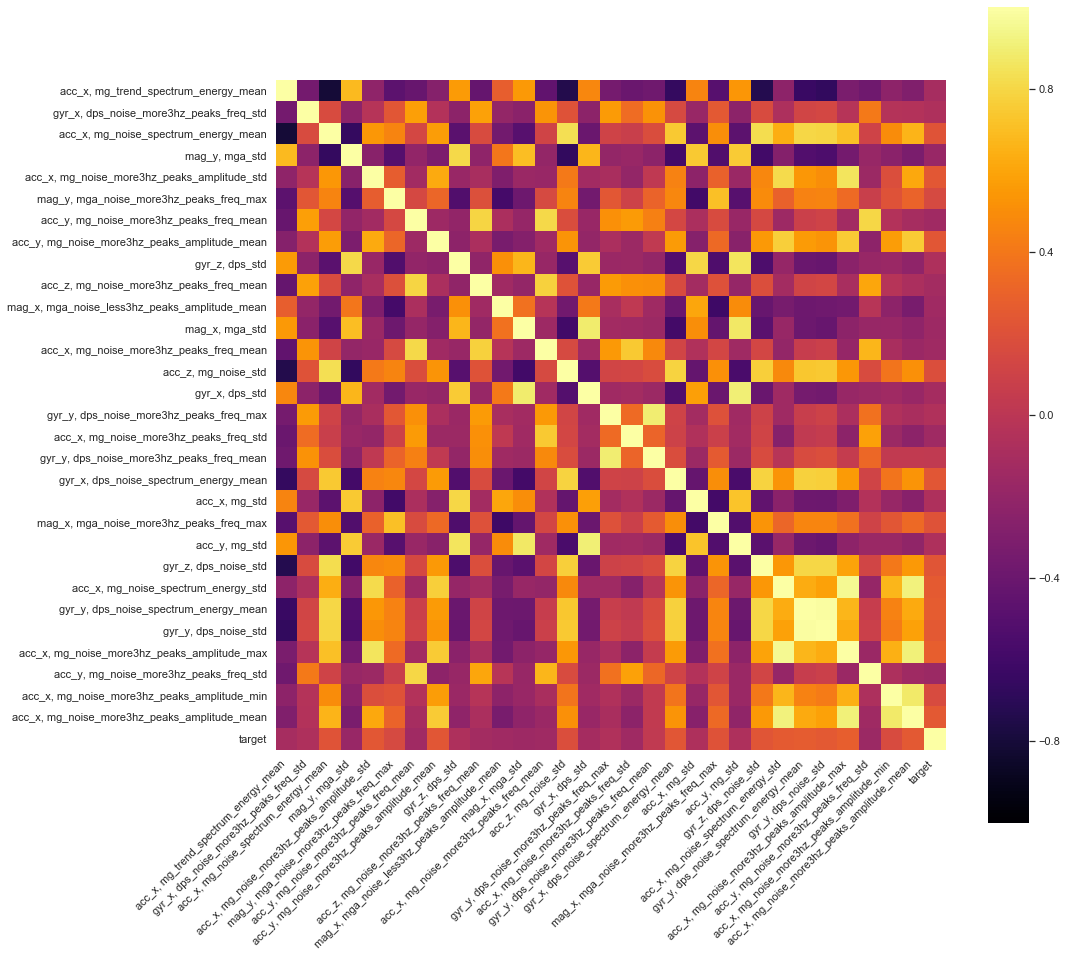

In [108]:
plt.figure(figsize= ( 15,15))
corr = train_features[features_list + ['target']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=plt.cm.inferno,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [109]:
feature_importance[features_list].values

array([0.00871215, 0.00892574, 0.00904092, 0.01028311, 0.01119937,
       0.01191992, 0.01214861, 0.01245177, 0.01257041, 0.01258785,
       0.0136783 , 0.01388735, 0.01451946, 0.01467762, 0.01507115,
       0.01512532, 0.01537907, 0.01542202, 0.01634597, 0.01732363,
       0.01775227, 0.01907353, 0.02036963, 0.02038499, 0.02049946,
       0.02403728, 0.02495839, 0.02640717, 0.03354768, 0.03364303])

In [117]:
features_list = ['acc_x, mg_trend_spectrum_energy_mean',
 'gyr_x, dps_noise_more3hz_peaks_freq_std',
 'acc_x, mg_noise_spectrum_energy_mean',
 'acc_x, mg_noise_more3hz_peaks_amplitude_std',
 'mag_y, mga_noise_more3hz_peaks_freq_max',
 'acc_y, mg_noise_more3hz_peaks_freq_mean',
 'acc_y, mg_noise_more3hz_peaks_amplitude_mean',
 'acc_z, mg_noise_more3hz_peaks_freq_mean',
 'mag_x, mga_noise_less3hz_peaks_amplitude_mean',
 'acc_x, mg_noise_more3hz_peaks_freq_mean',
 'gyr_y, dps_noise_more3hz_peaks_freq_max',
 'acc_x, mg_noise_more3hz_peaks_freq_std',
 'gyr_y, dps_noise_more3hz_peaks_freq_mean',
 'gyr_x, dps_noise_spectrum_energy_mean',
 'mag_x, mga_noise_more3hz_peaks_freq_max',
 'acc_x, mg_noise_spectrum_energy_std',
 'gyr_y, dps_noise_spectrum_energy_mean',
 'acc_x, mg_noise_more3hz_peaks_amplitude_max',
 'acc_y, mg_noise_more3hz_peaks_freq_std',
 'acc_x, mg_noise_more3hz_peaks_amplitude_min']

In [134]:
features_list_names = ['gyr_x Noise Power',
 'acc_x, Tremor Noise Frequency std',
 'gyr_x, Tremor Trend Frequency max',
 'acc_x, Tremor Noise Dominant Frequency',
 'gyr_y, Tremor Noise Amplitude min',
 'gyr_y, Noise Power',
 'acc_x, Tremor Noise Frequency mean',
 'acc_z, Tremor Noise Frequency mean',
 'gyr_y, Tremor Noise Frequency std',
 'mag_x, Tremor Noise Frequency mean',
 'gyr_x, Tremor Noise Frequency max',
 'acc_z, Tremor Noise Frequency std',
 'gyr_x, Tremor Noise Frequency mean',
 'acc_z, Tremor Noise Frequency max',
 'gyr_y, Tremor Noise Frequency max',
 'acc_x, Tremor Noise Amplitude mean',
 'acc_y, Tremor Noise Amplitude mean',
 'mag_x, Tremor Noise Amplitude mean',
 'mag_x, Brady Noise Frequency max',
 'acc_y, Noise Power']

In [135]:
len(features_list), len(features_list_names)

(20, 20)

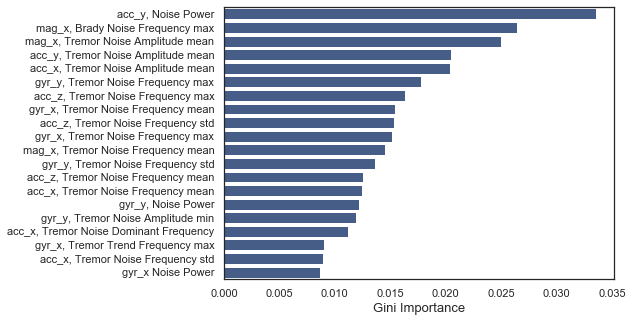

In [136]:
f, ax = plt.subplots(1,1, figsize = (7,5))
sns.barplot(x=  feature_importance[features_list[::-1]], y = features_list_names[::-1], palette=sns.xkcd_palette(['denim blue']), capsize = 15, ax = ax)
ax.set_xlabel('Gini Importance', fontsize = 13)
plt.savefig('C:/Users/alexandr/Desktop/plt.jpg', dpi = 400)


In [42]:
feature_importance

acc_z, mg_trend_less3hz_peaks_freq_max           0.000000
gyr_x, dps_mean                                  0.000000
gyr_x, dps_differential_mean                     0.000000
gyr_x, dps_noise_mean                            0.000000
mag_y, mga_noise_less3hz_peaks_amplitude_std     0.000000
mag_y, mga_noise_less3hz_peaks_amplitude_mean    0.000000
mag_y, mga_noise_less3hz_peaks_freq_std          0.000000
mag_y, mga_noise_less3hz_peaks_freq_mean         0.000000
gyr_x, dps_noise_less3hz_peaks_freq_std          0.000000
gyr_x, dps_noise_less3hz_peaks_freq_min          0.000000
mag_y, mga_noise_more3hz_dominant_amplitude      0.000000
mag_y, mga_noise_more3hz_peaks_amplitude_std     0.000000
gyr_x, dps_noise_less3hz_peaks_amplitude_std     0.000000
gyr_x, dps_noise_less3hz_peaks_amplitude_min     0.000000
mag_y, mga_noise_more3hz_dominant_frequency      0.000000
mag_y, mga_noise_more3hz_peaks_freq_min          0.000000
mag_y, mga_noise_mean                            0.000000
mag_y, mga_dif

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from fylearn.nfpc import FuzzyPatternClassifier
from fylearn.garules import MultimodalEvolutionaryClassifier
from fylearn.fpt import FuzzyPatternTreeTopDownClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

FPC = FuzzyPatternClassifier()
MEC = MultimodalEvolutionaryClassifier(n_iterations= 20)
FPC = FuzzyPatternTreeTopDownClassifier()
parameters = {'n_estimators': np.arange(200, 501, 100), 'max_depth' : np.arange(10, 61, 10)}
RFС = RandomForestClassifier(n_estimators = 30, max_depth = 10)
LinSVM = SVC(kernel = 'linear')
RbfSVM = SVC(kernel = 'rbf')
PolySVM = SVC(kernel = 'poly')
KNN = KNeighborsClassifier()
NB = GaussianNB()
LR = LogisticRegression()
DT = DecisionTreeClassifier(max_depth = 100)
QDA = QuadraticDiscriminantAnalysis()
GP = GaussianProcessClassifier(1.0 * RBF(1.0))

classifiers = {
     'RF' : RFС,
#      'Linear SVM' : LinSVM,
#      'rbf SVM' : RbfSVM,
#      'poly SVM': PolySVM,
     'KNN' : KNN, 
     'NB' : NB,
     'LR' : LR,
#      'DT' : DT,
#      'GaussProcess' : GP,
#      'QDA' : QDA
#      'Fuzzy Pattern' : FPC,
#      'MultiModalEvolutionary' : MEC,
#      'FuzzyPatternTreeTopDown' : FPC
}

In [44]:
classifiers

{'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=10, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=30,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'NB': GaussianNB(priors=None, var_smoothing=1e-09),
 'LR': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random

In [120]:
def small_predict(train_features, test_features, classifiers, 
                  parkinson_stage = True, balanced_accuracy = True):
    X_train = train_features
    X_test  = test_features
    y_train = X_train['target']
    y_test  = X_test['target']

    X_train = X_train.drop(columns= ['target'])
    X_test  = X_test.drop(columns= ['target'])

    X_train = pm.sclr.fit_transform(X_train)
    X_test  = pm.sclr.transform(X_test)
    df = pd.DataFrame()
#     df['train_len'] = [len(y_train)]
#     df['test_len'] = [len(y_test)]
#     print(y_test.shape, y_train.shape)
    for key in classifiers:
#         print(key)
        model = classifiers[key]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
#         print(len(y_pred))
        s = y_pred
        df[key] = y_pred
    
#     df['target'] = y_test
    

    return df
def predict_per_person(df, classifiers, features):
    results_with_double_exercise = pd.DataFrame()
    for name in df['name'].unique():
        test  = df[df['name'] == name][features + ['target']]
        train = df[df['name'] != name][features + ['target']]
        results = small_predict(train, test, classifiers, parkinson_stage = False, balanced_accuracy = False)
#         print(results.shape, test.shape)
#         print(test['target'])
        results['target'] = test['target'].values
#         print(results['target'])
#         results['name'] = name
        results_with_double_exercise = results_with_double_exercise.append(results, ignore_index = True)
    return results_with_double_exercise


def to_balanced_accuracy(X, y):
    to_return = pd.DataFrame()
#     metrics
    for col in X:
        to_return[col] = [pm.balanced_accuracy_score(X[col], y)]
    return to_return

def to_accuracy(X, y):
    to_return = pd.DataFrame()
    for col in X:
        to_return[col] = [pm.accuracy_score(X[col], y)]
    return to_return

# def to_precision

In [126]:
Parkinson_total_df = features[(features['target'] != 4) * (features['target'] != 3)]
